#**Exoplanets - Classifier**

Bunch of classifiers implementations using Caltech Dataset of Exoplanets.


In [1]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Processing**

In [35]:
dataset = pd.read_csv('/content/drive/MyDrive/Exoplanets Dataset/Exoplanets-Dataset-1505.csv', delimiter='\t')

In [36]:
dataset = dataset.drop(dataset.index[0:85])

In [37]:
dataset = dataset.rename(columns={'# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu': 'data'})

In [ ]:
dataset.iloc[0].data

In [39]:
dataset = dataset.join(dataset['data'].str.split(',', expand=True))
dataset = dataset.drop('data', 1)

headers = dataset.iloc[0]
dataset  = pd.DataFrame(dataset.values[1:], columns=headers)

dataset.head()

85,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,...,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.0000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488035570,170.5387500,2455003.539,0,,0.1460,2.95750,,6.1580e+02,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810000,Claret (2011 A&A 529 75) ATLAS LS,0.0000,0.0000,0.2291,0.4603,q1_q17_dr25_koi,5.1358490,...,142,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.68640,Mandel and Agol (2002 ApJ 580 171),,,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.00,4.467,0.1400,0.9270,0.9190,,q1_q17_dr25_stellar,291.934230,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294000,48.14191000,0.43000,0.94000,-2.000000e-04,-5.500000e-04,-0.0100,0.2000,0.2000,0.0800,0.3100,0.3200
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.9690,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418382700,162.5138400,2454995.514,0,,0.5860,4.50700,,8.7480e+02,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900000,Claret (2011 A&A 529 75) ATLAS LS,0.0000,0.0000,0.2291,0.4603,q1_q17_dr25_koi,7.0276690,...,25,2,q1_q17_dr25_tce,11111111111111111000000000000000,0.00230,Mandel and Agol (2002 ApJ 580 171),,,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.00,4.467,0.1400,0.9270,0.9190,,q1_q17_dr25_stellar,291.934230,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265000,48.14199000,-0.63000,1.23000,6.600000e-04,-1.050000e-03,0.3900,0.0000,0.3900,0.4900,0.1200,0.5000
2,3,10811496,K00753.01,,CANDIDATE,Done,2018-08-16,CANDIDATE,0.0000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899139950,175.8502520,2455008.850,0,,0.9690,1.78220,,1.0829e+04,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500000,Claret (2011 A&A 529 75) ATLAS LS,0.0000,0.0000,0.2711,0.3858,q1_q17_dr25_koi,37.1597670,...,56,1,q1_q17_dr25_tce,11111101110111011000000000000000,0.66240,Mandel and Agol (2002 ApJ 580 171),,,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.00,4.544,-0.1800,0.8680,0.9610,,q1_q17_dr25_stellar,297.004820,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800320700,48.13412000,-0.02100,-0.03800,7.000000e-04,6.000000e-04,-0.0250,-0.0340,0.0420,0.0020,-0.0270,0.0270
3,4,10848459,K00754.01,,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.0000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952453,170.3075650,2455003.308,0,,1.2760,2.40641,,8.0792e+03,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278000,Claret (2011 A&A 529 75) ATLAS LS,0.0000,0.0000,0.2865,0.3556,q1_q17_dr25_koi,39.0665500,...,621,1,q1_q17_dr25_tce,11111110111011101000000000000000,0.00000,Mandel and Agol (2002 ApJ 580 171),,,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.00,4.564,-0.5200,0.7910,0.8360,,q1_q17_dr25_stellar,285.534610,48.285

In [40]:
colunas_selecionadas = ['koi_disposition',
                        'koi_period', 
                        'koi_duration',
                        'koi_prad',
                        'koi_model_snr',
                        'koi_steff',
                        'koi_slogg',
                        'koi_smet',
                        'koi_srad',
                        'koi_smass',
                        'koi_kepmag']

dataset = dataset[colunas_selecionadas]
dataset = dataset[~dataset.isin(['']).any(axis=1)]

x = dataset[colunas_selecionadas[1:10]]
y = dataset['koi_disposition']

x.apply(pd.to_numeric)

85,koi_period,koi_duration,koi_prad,koi_model_snr,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass
0,9.488036,2.95750,2.26,35.8,5455.0,4.467,0.14,0.927,0.919
1,54.418383,4.50700,2.83,25.8,5455.0,4.467,0.14,0.927,0.919
2,19.899140,1.78220,14.60,76.3,5853.0,4.544,-0.18,0.868,0.961
3,1.736952,2.40641,33.46,505.6,5805.0,4.564,-0.52,0.791,0.836
4,2.525592,1.65450,2.75,40.9,6031.0,4.438,0.07,1.046,1.095
...,...,...,...,...,...,...,...,...,...
9559,0.527699,3.22210,29.35,453.3,5638.0,4.529,0.14,0.903,1.005
9560,1.739849,3.11400,0.72,10.6,6119.0,4.444,-0.04,1.031,1.075
9561,0.681402,0.86500,1.07,12.3,6173.0,4.447,-0.04,1.041,1.104
9562,333.486169,3.19900,19.30,14.0,4989.0,2.992,0.07,7.824,2.190


In [ ]:
y = y.replace(to_replace=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], value=[1, 0, 2])
y.apply(pd.to_numeric)

In [ ]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(x) 
x.loc[:,:] = scaled_values

In [43]:
pd.options.display.max_seq_items = 2000
x.head(1000)

85,koi_period,koi_duration,koi_prad,koi_model_snr,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass
0,0.000071,0.020980,0.000011,0.003954,0.211107,0.831296,0.862745,0.003560,0.229677
1,0.000417,0.032169,0.000014,0.002849,0.211107,0.831296,0.862745,0.003560,0.229677
2,0.000151,0.012494,0.000072,0.008427,0.241179,0.845778,0.758170,0.003303,0.241370
3,0.000012,0.017001,0.000167,0.055838,0.237552,0.849539,0.647059,0.002968,0.206570
4,0.000018,0.011571,0.000013,0.004517,0.254628,0.825842,0.839869,0.004077,0.278675
...,...,...,...,...,...,...,...,...,...
1010,0.000262,0.142005,0.000016,0.007366,0.213751,0.792928,0.862745,0.004604,0.227450
1011,0.000034,0.020630,0.000008,0.001877,0.252210,0.836374,0.797386,0.003699,0.264755
1012,0.000075,0.042285,0.000012,0.002408,0.218814,0.750423,0.869281,0.006558,0.261971
1013,0.000021,0.020034,0.000006,0.003633,0.267473,0.832236,0.751634,0.003829,0.268374


# **Classifiers Approach**

In [11]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [ ]:
model1 = DecisionTreeClassifier() 
model1.fit(x_treino, y_treino)

In [ ]:
model2 = RandomForestClassifier()
model2.fit(x_treino, y_treino)

In [ ]:
model3 = KNeighborsClassifier()
model3.fit(x_treino, y_treino)

In [ ]:
model = MLPClassifier(max_iter=500)
model.fit(x_treino, y_treino)

In [ ]:
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model4.fit(x_treino, y_treino)

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(x_treino, y_treino)

In [ ]:
model = VotingClassifier(estimators=[('Decision Tree', model1), ('Random Forest', model2), ('KNN', model3), ('GBC', model4)], voting='soft')
model.fit(x_treino, y_treino)

In [ ]:
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(x_treino, y_treino)

In [20]:
y_predict = model.predict(x_teste)

In [ ]:
print(classification_report(y_teste, y_predict, target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

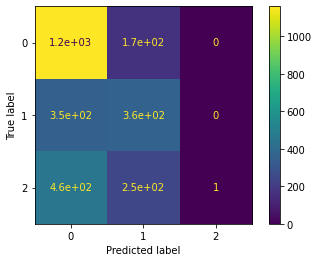

In [22]:
_ = plot_confusion_matrix(model, x_teste, y_teste)  

# **Neural Network Approach**

Not tested.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(x.shape[0], EMBEDDING_DIM, input_length=len(x.columns)))
model.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())

In [ ]:
history = model.fit(x_treino, y_treino,
                    batch_size=1,
                    epochs=30,
                    verbose=2,
                    validation_split=0.2)